In [1]:
%load_ext autoreload
%autoreload 2

import sys

from sklearn.tree import export_text

sys.path.append('../..')
from viz import *
import viz
import imodels
from os.path import join as oj

mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
from imodels.util.data_util import get_clean_dataset
from config.saps.datasets import DATASETS_CLASSIFICATION, DATASETS_REGRESSION
from sklearn.tree import DecisionTreeClassifier
from util import DATASET_PATH
print('num_datasets', len(DATASETS_CLASSIFICATION), len(DATASETS_REGRESSION))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

Matplotlib is building the font cache; this may take a moment.
/accounts/projects/vision/.local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


num_datasets 11 9


100%|██████████| 6/6 [00:00<00:00, 13.03it/s]


<Figure size 2250x1250 with 0 Axes>

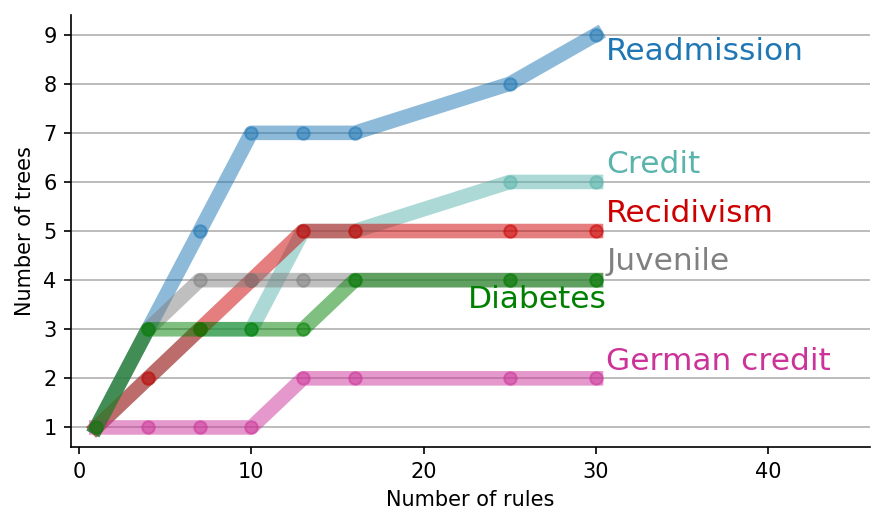

In [121]:
num_dsets = 6
datasets = DATASETS_CLASSIFICATION[::-1][:6] #+ DATASETS_REGRESSION[::-1]

R, C = ceil(num_dsets / 3), 3
plt.figure(figsize=(3 * C, 2.5 * R), facecolor='w')

COLORS = [cb, cg, cr, 'gray', cp, 'green']
COLORS = COLORS + COLORS + COLORS
plt.figure(figsize=(6, 3.6), dpi=150)
for i, dset in enumerate(tqdm(datasets)):
    dset_name = dset[0]
#     print(dset_name)

    pkl_file = oj('../../results', 'saps', dset_name, 'train-test/seed0/results_aggregated.pkl')
    data = pkl.load(open(pkl_file, 'rb'))  #['df']

    rules = data['df_rules']
#     rules['model'] = rules.index
    rules.index = np.arange(rules.shape[0])

    df = data['df']
#     df['model'] = df.index
    df.index = np.arange(df.shape[0])

    cols_to_use = df.columns.difference(rules.columns)
    d = rules.join(df[cols_to_use])

#     print('d', d)
    g = d[d.estimator == 'SAPS']
#     print('g', g)
    name = 'SAPS'
    est_params = g[dset_name]
#     print(est_params.iloc[0])
    trees = [x['trees_'] for x in est_params]  # change this to x['trees_']
    n_trees = np.array([len(t) for t in trees])

    x = g['complexity'].values
#     print(x, n_trees)
    plt.plot(x, n_trees, 'o-',
             alpha=0.5,
             label=dset_name.capitalize().replace('-', ' '), color=COLORS[i], lw=7)
    plt.ylabel('Number of trees')
    plt.xlabel('Number of rules')

# plt.legend(labelcolor='linecolor')
dvu.line_legend(adjust_text_labels=True, extra_spacing=0.5)
plt.grid(axis='y')
viz.savefig('num_trees')